In [1]:
import sys,os
import numpy as np
import pylab as py
import pandas as pd
import jam16ff
from jam16ff import get_zf
PATH='../python/'
sys.path.append(PATH)  # path of the JAMLIB python folder is located
from corelib import JAMLIB
from tools import load,checkdir
%matplotlib inline

In [2]:
## posterior for LHAPDF corresponds to posterior 
## of PYTHON + 1 since 0th posterior in LHAPDF is central value

ipos_PYTHON=0
ipos_LHAPDF=ipos_PYTHON+1

##Load grids##

jam16ff.grid_init('pion',ipos_LHAPDF)
jamlib=JAMLIB(PATH+'JAM16/FFpion')
data=pd.read_excel('JAM16FF_pi_0001.xlsx')

########################################################## 
                                                           
     _   _    __  __ _     ___ ____                        
    | | / \  |  \/  | |   |_ _| __ )                       
 _  | |/ _ \ | |\/| | |    | ||  _ \                       
| |_| / ___ \| |  | | |___ | || |_) |                      
 \___/_/   \_\_|  |_|_____|___|____/                       
                                                           
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
                                                           
Authors:                                                   
Nobuo Sato         (Jefferson Lab)                         
Jake Ethier        (College of William and Mary)           
Wally Melnitchouk  (Jefferson Lab)                         
Alberto Accardi    (Hampton University and Jefferson Lab)  
########################################################## 
loading tables [100%]


[0.05, 1.0, 0.4, 1.4]

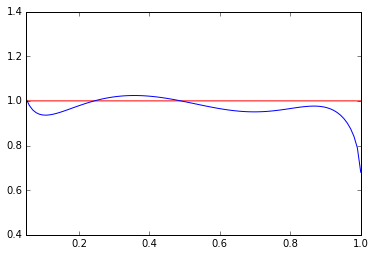

In [3]:
Z=np.linspace(0.05,1.,100)
Q2=1.0
grid=np.zeros(len(Z))
for iz in range(len(Z)):
  in1 = 30*(iz)
  grid[iz]=data['Ddp'][in1]
  
Dup = np.array([get_zf('up',z,Q2) for z in Z])
NS_Dup = np.array([jamlib.get_XF(ipos_PYTHON,'up',z,Q2) for z in Z])

py.plot(Z,Dup/grid,'r-')
py.plot(Z,NS_Dup/grid,'b-')
py.axis([0.05,1.,0.4,1.4])

In [2]:
cnt=0
for f in os.listdir('FFpion_python'):
  table=load('../fortran/FFpion_python/'+f)
  output = open('FFpion_fortran/'+f,'w')
  sys.stdout = output
  xvals=["%10.4e" %table['X'][i] for i in range(100)]
  print ' '.join(xvals)
  Q2vals=["%10.4e" %table['Q2'][i] for i in range(30)]
  print ' '.join(Q2vals)
  for i in range(100):
    for j in range(30):
      print "%12.5e %12.5e %12.5e %12.5e %12.5e %12.5e"%(table['FFpion']['dp'][i,j],table['FFpion']['up'][i,j],\
                                                          table['FFpion']['sp'][i,j],table['FFpion']['cp'][i,j],\
                                                           table['FFpion']['bp'][i,j],table['FFpion']['g'][i,j])
  sys.stdout=stdout
  output.close()


NameError: name 'stdout' is not defined